# Equilibrium Properties and Partial Ordering (Al-Fe and Al-Ni)

In [1]:
# Only needed in a Jupyter Notebook
%matplotlib inline
# Optional plot styling
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('bmh')

In [2]:
from pycalphad import Database, Workspace, as_property, variables as v

## Al-Fe (Heat Capacity and Degree of Ordering)
Here we compute equilibrium thermodynamic properties in the Al-Fe system. We know that only B2 and liquid are stable in the temperature range of interest, but we just as easily could have included all the phases in the calculation using `my_phases = list(db.phases.keys())`. Notice that the syntax for specifying a range is `(min, max, step)`. We can also directly specify a list of temperatures using the list syntax, e.g., `[300, 400, 500, 1400]`.

In [3]:
dbf = Database('alfe_sei.TDB')
my_phases = ['LIQUID', 'B2_BCC']
wks1 = Workspace(dbf, ['AL', 'FE', 'VA'], my_phases,
                 {v.X('AL'): 0.25, v.T: (300, 2000, 50), v.P: 101325, v.N: 1})

We also compute degree of ordering at fixed temperature as a function of composition.

In [4]:
wks2 = Workspace(dbf, ['AL', 'FE', 'VA'], my_phases,
                 {v.X('AL'): (0,1,0.01), v.T: 700, v.P: 101325, v.N: 1})

### Plots
Next we plot the degree of ordering versus temperature. We can see that the decrease in the degree of ordering is relatively steady and continuous. This is indicative of a second-order transition from partially ordered B2 to disordered bcc (A2).

Text(0, 0.5, 'Degree of ordering')

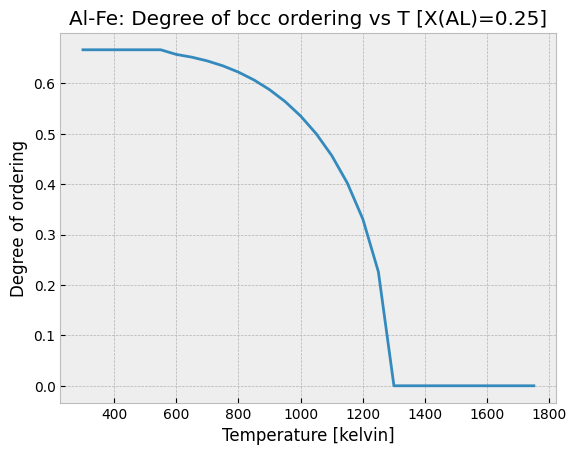

In [5]:
degree_of_ordering = as_property('degree_of_ordering(B2_BCC)')
degree_of_ordering.display_name = 'Degree of ordering'
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Al-Fe: Degree of bcc ordering vs T [X(AL)=0.25]')
ax.plot(wks1.get(v.T), wks1.get(degree_of_ordering))
ax.set_xlabel(f'{v.T.display_name} [{v.T.display_units}]')
ax.set_ylabel(f'{degree_of_ordering.display_name}')

For the heat capacity curve shown below we notice a sharp increase in the heat capacity around 750 K. This is indicative of a magnetic phase transition and, indeed, the temperature at the peak of the curve coincides with 75% of 1043 K, the Curie temperature of pure Fe. (Pure bcc Al is paramagnetic so it has an effective Curie temperature of 0 K.)

The decrease in heat capacity near 1250 K corresponds to the order-disorder transition observed in the above figure. We also observe a sharp jump in the heat capacity near 1800 K, corresponding to the melting of the bcc phase.

Text(0, 0.5, 'Heat Capacity [J/mol/K]')

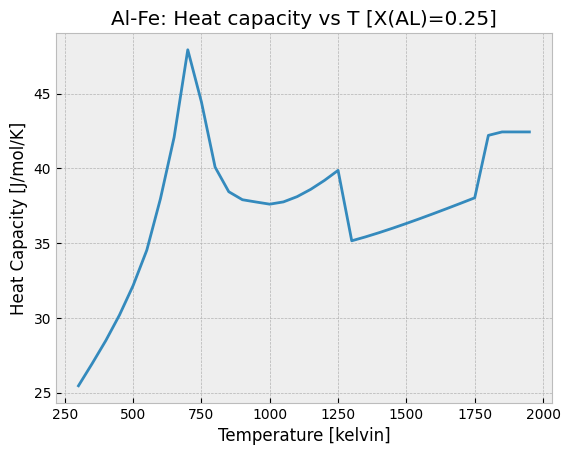

In [6]:
heat_capacity = as_property('HM.T')
heat_capacity.display_name = 'Heat Capacity'
heat_capacity.display_units = 'J/mol/K'
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Al-Fe: Heat capacity vs T [X(AL)=0.25]')
ax.plot(wks1.get(v.T), wks1.get(heat_capacity))
ax.set_xlabel(f'{v.T.display_name} [{v.T.display_units}]')
ax.set_ylabel(f'{heat_capacity.display_name} [{heat_capacity.display_units}]')

To understand more about what's happening around 700 K, we plot the degree of ordering versus composition. Note that this plot excludes all other phases except `B2_BCC`. We observe the presence of disordered bcc (A2) until around 13% Al or Fe, when the phase begins to order.

Text(0, 0.5, 'Degree of ordering')

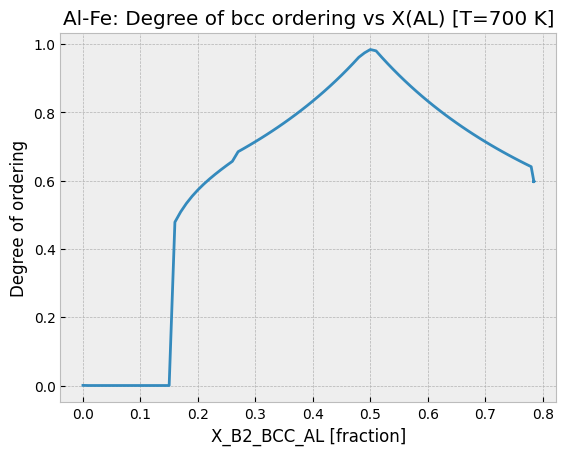

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Al-Fe: Degree of bcc ordering vs X(AL) [T=700 K]')
ax.plot(wks2.get(v.X('B2_BCC', 'AL')), wks2.get(degree_of_ordering))
ax.set_xlabel(f"{v.X('B2_BCC', 'AL').display_name} [{v.X('B2_BCC', 'AL').display_units}]")
ax.set_ylabel(f'{degree_of_ordering.display_name}')

Notice that the plot abruptly ends around 0.8 fraction of Al, corresponding to the (metastable, because only liquid is entered) limit of stability of B2 on the phase diagram at this temperature. Because we want to plot in the metastable region, we will now tell pycalphad that we want to remove liquid from the calculation and then repeat it.

Text(0, 0.5, 'Degree of ordering')

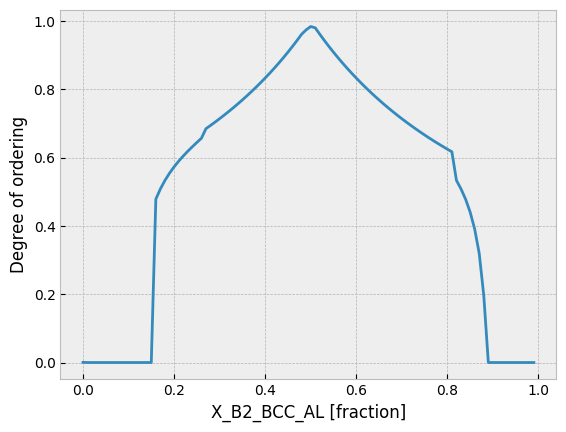

In [8]:
wks2.phases = ['B2_BCC']

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(wks2.get(v.X('B2_BCC', 'AL')), wks2.get(degree_of_ordering))
ax.set_xlabel(f"{v.X('B2_BCC', 'AL').display_name} [{v.X('B2_BCC', 'AL').display_units}]")
ax.set_ylabel(f'{degree_of_ordering.display_name}')

## Al-Ni (Degree of Ordering)

In [9]:
db_alni = Database('NI_AL_DUPIN_2001.TDB')
phases = ['LIQUID', 'FCC_L12']
wks3 = Workspace(db_alni, ['AL', 'NI', 'VA'], phases,
                 {v.X('AL'): 0.10, v.T: (300, 2500, 20), v.P: 101325})

### Plots
In the plot below we observe two phases designated `FCC_L12`. This is indicative of a miscibility gap. The ordered gamma-prime phase steadily decreases in amount with increasing temperature until it completely disappears around 750 K, leaving only the disordered gamma phase.

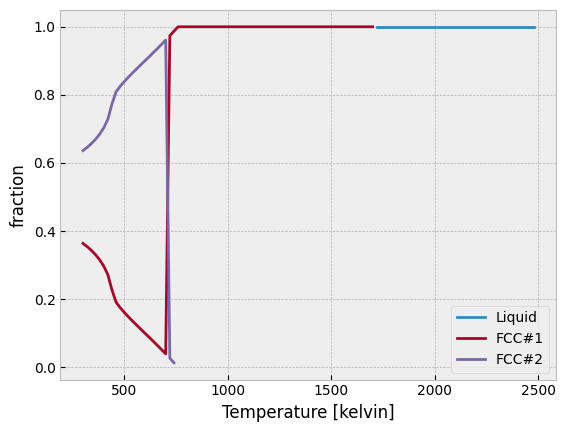

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(wks3.get(v.T), wks3.get('NP(LIQUID)'), label='Liquid')
ax.plot(wks3.get(v.T), wks3.get('NP(FCC_L12#1)'), label='FCC#1')
ax.plot(wks3.get(v.T), wks3.get('NP(FCC_L12#2)'), label='FCC#2')
ax.set_xlabel(f'{v.T.display_name} [{v.T.display_units}]')
ax.set_ylabel('fraction')
ax.legend()

In the plot below we see that the degree of ordering does not change at all in each phase. There is a very abrupt disappearance of the completely ordered gamma-prime phase, leaving the completely disordered gamma phase. This is a first-order phase transition.

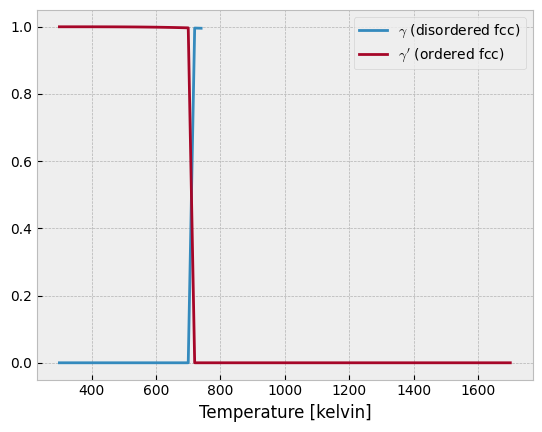

In [11]:
dis_degree_of_ordering = as_property('degree_of_ordering(FCC_L12#2)')
dis_degree_of_ordering.display_name = '$\gamma$ (disordered fcc)'
L12_degree_of_ordering = as_property('degree_of_ordering(FCC_L12#1)')
L12_degree_of_ordering.display_name = '$\gamma^\prime$ (ordered fcc)'

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(wks3.get(v.T), wks3.get(dis_degree_of_ordering),
        label=dis_degree_of_ordering.display_name)
ax.plot(wks3.get(v.T), wks3.get(L12_degree_of_ordering),
        label=L12_degree_of_ordering.display_name)
ax.set_xlabel(f'{v.T.display_name} [{v.T.display_units}]')
ax.legend()